## Part- 1

In [1]:
import torch

In [4]:
def activation(x):
    return 1/(1+torch.exp(-x))



In [5]:
torch.manual_seed(7) #generates data

#generates 5 random vars, size is 1 row and 5 columns
features = torch.randn((1,5))

#generate weights with same shape as features
weights = torch.randn_like(features)

#define a bias term
bias = torch.randn((1,1))

In [6]:
#First, calculate output using weights and bias tensors

y = activation((features*weights).sum() + bias)
print(y)

tensor([[0.1595]])


In [10]:
# Second, calculate output of network using matrix multiplication

y = activation(torch.mm(features, weights.view(5,1)) + bias)
print(y)

tensor([[0.1595]])


### Adding more layers

In [11]:
#generate more data
torch.manual_seed(7)

#features are 3 random normal variables
features = torch.randn((1,3))

#define the size of each layer in the network
n_input = features.shape[1] #must match number of input features
n_hidden = 2
n_output = 1

#weights for input to hidden layer
w1 = torch.randn(n_input,n_hidden)

#weights for hidden to output layer
w2 = torch.randn(n_hidden, n_output)

#bias terms for both layers
b1 = torch.randn((1, n_hidden))
b2 = torch.randn((1, n_output))

In [12]:
h = activation(torch.mm(features, w1) + b1)
output = activation(torch.mm(h, w2) + b2)
print(output)

tensor([[0.3171]])


## Part- 2 Neural Networks with PyTorch

In [13]:
#import more packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt


In [14]:
from torchvision import datasets, transforms

#data normalization using transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)),
                               ])

#download and load training data aka MNIST dataset here. 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', 
                         download = True,
                         train = True, 
                         transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=64, #64 images in each iteration
                                         shuffle =True)

In [15]:
dataiter = iter(trainloader) #iterate thru dataset 
images, labels = dataiter.next() #get the image and associated label in each iteration

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


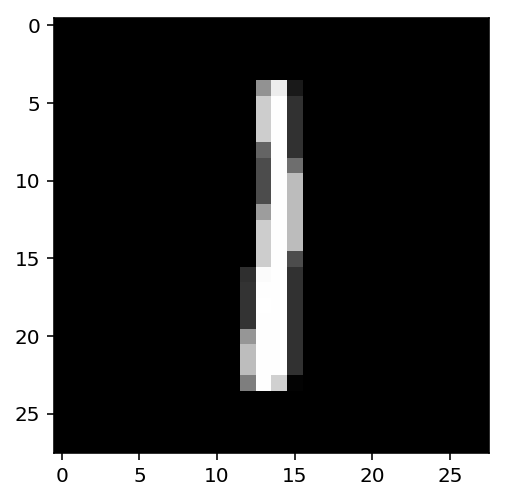

In [18]:
#plot an example
plt.imshow(images[3].numpy().squeeze(), cmap='Greys_r')

**Exercise**: Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [20]:
#use activation func defined above

inputs = images.view(images.shape[0], -1)
#batch size remains the same while -1 flattens the image

W1 = torch.randn(784,256)
B1 = torch.randn(256)

W2=torch.randn(256,10)
B2=torch.randn(10)

h = activation(torch.mm(inputs,W1)+B1)
output = activation(torch.mm(h,W2)+B2)

print(output.shape)

torch.Size([64, 10])
